In [16]:
from Precode import *
import numpy as np
import scipy.io
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = np.load('AllSamples.npy')

### Initializing data and getting initial centroids

In [17]:
k1,i_point1,k2,i_point2 = initial_S1('8816') # please replace 0111 with your last four digit of your ID
i_p1 = pd.DataFrame(i_point1, columns = ['x', 'y'])
i_p2 = pd.DataFrame(i_point2, columns = ['x', 'y'])

Strategy 1: k and initial points


In [47]:
def calculate_distances(df,centroids):
    centroid_distance_list = []
    for x in (centroids.index):
        x1 = (centroids.iloc[x]['x'])
        y1 = (centroids.iloc[x]['y'])
        centroid_point = np.array([x1,y1])
        for i in df.index:
            x2 = (df.iloc[i]['x'])
            y2 = (df.iloc[i]['y'])
            datapoint = np.array([x2,y2])
            diff = (centroid_point-datapoint)
            centroid_distance_list.append(np.linalg.norm(diff))
        df[x] = centroid_distance_list
        centroid_distance_list = []
    df['cluster_id'] = df[centroids.index].idxmin(axis = 1)
    df_clustered = df
    for id in sorted(df.cluster_id.unique()):
        mean_x = df.query('cluster_id == ' +str(id))['x'].mean()
        mean_y = df.query('cluster_id == ' + str(id))['y'].mean()
        centroid_distance_list.append([mean_x,mean_y])
    new_centroids = pd.DataFrame(centroid_distance_list,columns = ['x', 'y']).round(5)
    
    return new_centroids, df_clustered

In [48]:
def plot_points(df_clustered,new_centroids):
    sns.set_style('darkgrid')
    sns.scatterplot(data = df_clustered, x = 'x', y = 'y', hue = 'cluster_id', palette='rainbow')
    sns.scatterplot(data = new_centroids, x = 'x', y = 'y', color = 'black' , s = 100)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()
    plt.close()

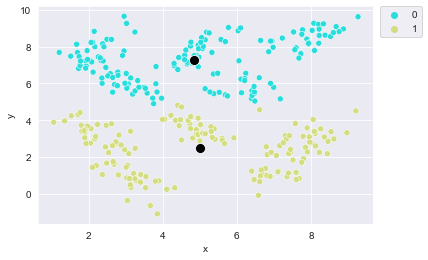

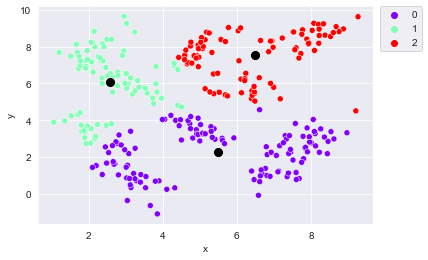

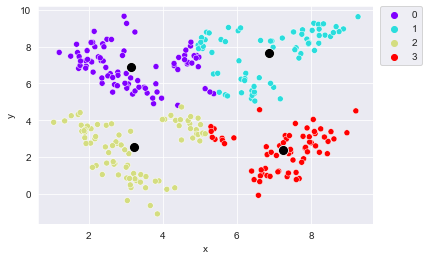

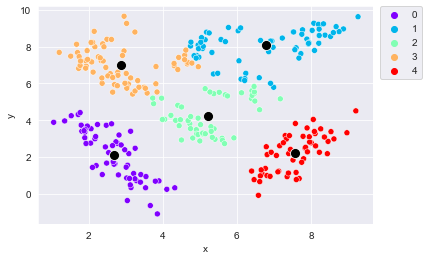

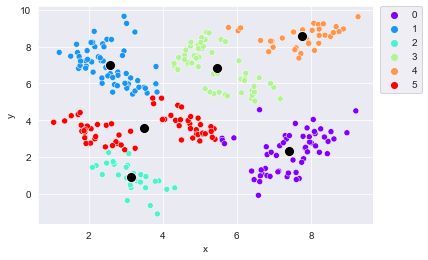

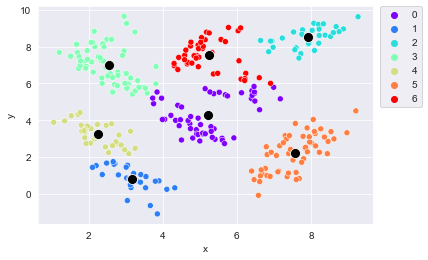

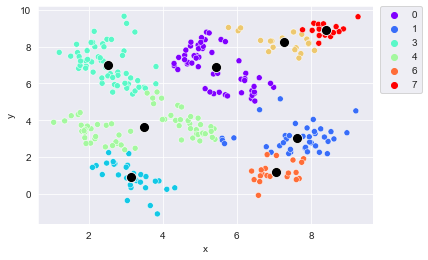

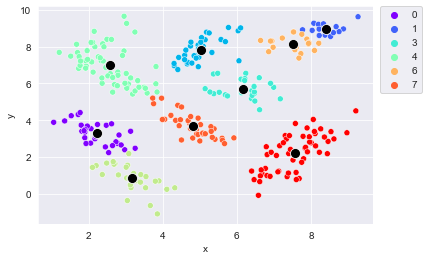

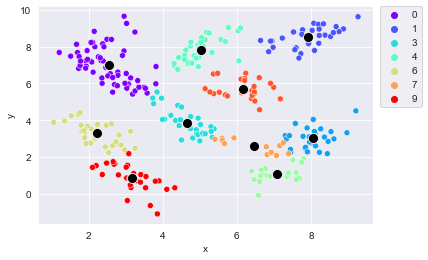

In [50]:
cost_function_by_k = {}
centroids_by_k = {}

df = pd.DataFrame(data)
df.columns = ['x','y']
df_0 = df.copy()
    

for k_value in range(2,11):
    
    if k_value == k1: 
        centroids = i_p1
    elif k_value == k2: 
        centroids = i_p2
    else:
        centroids = df.sample(n = k_value)[['x','y']].reset_index().drop('index', axis = 1)
    
    centroids =  centroids.round(5)

    new_centroids = pd.DataFrame()
    count = 0
    ongoing = True
    while ongoing:
        if count > 1:
            centroids = new_centroids
        new_centroids,df_clustered = calculate_distances(df,centroids)
        count +=  1
        if new_centroids.equals(centroids):
            ongoing == False
            break

    df_list = []
    for x in sorted(df_clustered.cluster_id.unique()):
        df_query = (df_clustered.query('cluster_id == '+str(x)).filter(['cluster_id','x','y',x]))
        df_query.columns = ['cluster_id','x','y','distance']
        df_query['mean_dist'] = df_query.distance.mean()
        df_list.append(df_query)
    df_clustered = pd.concat(df_list,axis = 0)

    cost_value = 0
    df_list = [x.filter(['cluster_id','x','y','distance','mean_dist']) for x in df_list]
    for x in new_centroids.index:
        x1 = (new_centroids.iloc[x]['x'])
        y1 = (new_centroids.iloc[x]['y'])

        
        for i in df_list[x].reset_index().index:
            x2 = (df_list[x].iloc[i]['x'])
            y2 = (df_list[x].iloc[i]['y'])

            cost_value += ((x2-x1)+(y2-y1))**2
    
    centroids_by_k[k_value] = np.array(new_centroids)
    cost_function_by_k[k_value] = cost_value  

    #print('cost value:', cost_value)
    #print('centroids:',new_centroids)
    plot_points(df_clustered,new_centroids)


Text(0.5, 1.0, 'Strategy 1 k-Means Clustering')

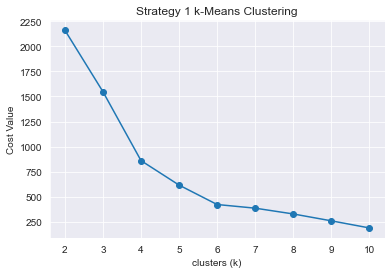

In [64]:
plt.plot(cost_function_by_k.keys(), cost_function_by_k.values(),marker='o')
plt.ylabel('Cost Value')
plt.xlabel('clusters (k)')
plt.title('Strategy 1 k-Means Clustering')